In [130]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import cv2

In [131]:
gImg = r'C:\Users\Gadhiya\OneDrive\Desktop\ComputerVision\grayImg1.jpg'
bImg = r'C:\Users\Gadhiya\OneDrive\Desktop\ComputerVision\bImg2.png'

In [132]:
gImg = plt.imread(gImg)
bImg2 = plt.imread(bImg)
gImg.shape

(183, 275, 3)

---
### 145 - Binary Image
---

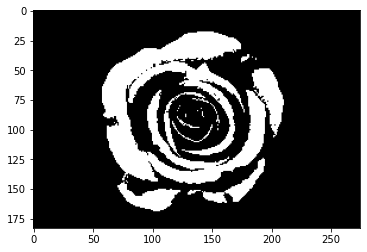

In [133]:
th = 150
im2 = gImg[:,:,0]>th
plt.imshow(im2, cmap='gray')

---
### 147 - Structuring Element Python
---

In [134]:
kRect = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
kRect

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [135]:
kEllipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8,8))
kEllipse

array([[0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

In [136]:
kCross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
kCross

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

---
### 153 - Eroison Python
---

In [137]:
kEllipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))

In [138]:
E_r = cv2.erode(bImg2, kRect)
E_e = cv2.erode(bImg2, kEllipse)
E_c = cv2.erode(bImg2, kCross)

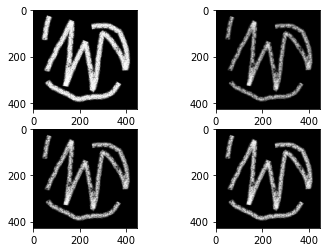

In [139]:
plt.subplot(221)
plt.imshow(bImg2)
plt.subplot(222)
plt.imshow(E_r)
plt.subplot(223)
plt.imshow(E_e)
plt.subplot(224)
plt.imshow(E_c)
plt.show()

In [140]:
# pixels which are not same : basically diff between two imgs
np.sum(E_r-E_c)**2

230073260.2775612

---
### 159 - Dilation Python
---

In [141]:
D_r = cv2.dilate(bImg2, kRect)
D_e = cv2.dilate(bImg2, kEllipse)
D_c = cv2.dilate(bImg2, kCross)

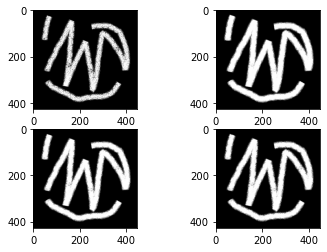

In [142]:
plt.subplot(221)
plt.imshow(bImg2)
plt.subplot(222)
plt.imshow(D_r)
plt.subplot(223)
plt.imshow(D_e)
plt.subplot(224)
plt.imshow(D_c)
plt.show()

In [144]:
# pixels which are not same : basically diff between two imgs
np.sum(D_r-D_c)**2

119313294.37890625

---
### Image Opening Python
---

In [145]:
bImgBool = np.array(bImg2[:,:,0], dtype=bool)
bImgBool.dtype

dtype('bool')

In [146]:
N = np.random.rand(bImgBool.shape[0],bImgBool.shape[1])

In [147]:
N_binary = N>0.9

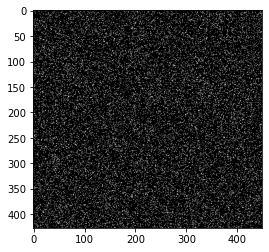

In [148]:
plt.imshow(N_binary, cmap='gray')

In [149]:
imgN = bImgBool | N_binary

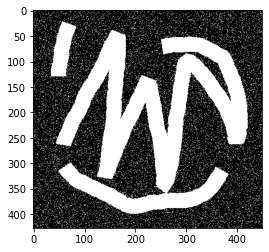

In [150]:
plt.imshow(imgN, cmap='gray')

In [151]:
O_r = cv2.morphologyEx(np.float32(imgN),cv2.MORPH_OPEN,kRect)

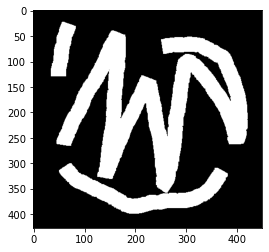

In [152]:
plt.imshow(O_r,cmap='gray')

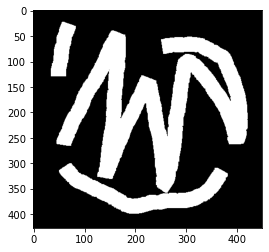

In [153]:
# another way
E_r = cv2.erode(np.float32(imgN),kRect)
O_r2 = cv2.dilate(E_r,kRect)
plt.imshow(O_r2, cmap='gray')

In [154]:
# pixels which are not same : basically diff between two imgs
np.sum(O_r-O_r2)**2

0.0

---
### 163 - Closing Python
---

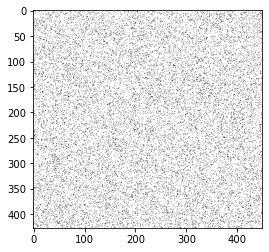

In [155]:
N_binary = N<0.9
plt.imshow(N_binary, cmap='gray')

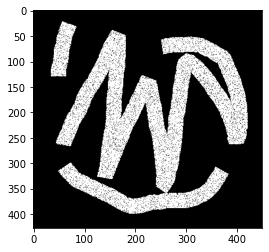

In [156]:
imgN = bImgBool & N_binary
plt.imshow(imgN, cmap='gray')

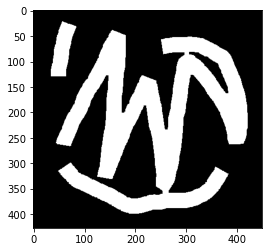

In [157]:
c_r = cv2.morphologyEx(np.float32(imgN),cv2.MORPH_CLOSE,kRect)
plt.imshow(c_r,cmap='gray')

---
### 165 - Gradient Morphology Python
---

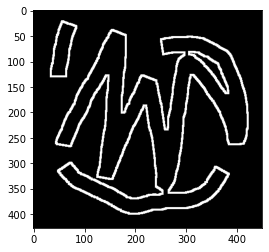

In [158]:
g_r = cv2.morphologyEx(c_r,cv2.MORPH_GRADIENT,kRect)     # first dilate then eroison then dilate-eroison
plt.imshow(g_r,cmap='gray')

---
### 166 - Tophat & Blackhat
---

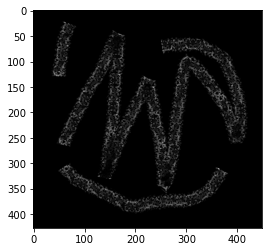

In [159]:
t_r = cv2.morphologyEx(bImg2,cv2.MORPH_TOPHAT,kRect)     # opening - closing
plt.imshow(t_r,cmap='gray')

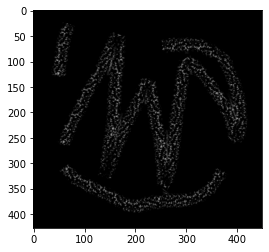

In [160]:
b_r = cv2.morphologyEx(bImg2,cv2.MORPH_BLACKHAT,kRect)     # closing - opening
plt.imshow(b_r,cmap='gray')